In [1]:
import time
import numpy as np
import pandas as pd
import math
from io import StringIO
from numpy import linalg as LA
from numpy import save
from numpy import load
from matplotlib import pyplot as plt
from matplotlib import colors

In [2]:
path_matriz_modelo_npy = "C:\\Users\\joaop\\Desktop\\trabaio\\input\\H-1.npy"
path_matriz_modelo_csv = "C:\\Users\\joaop\\Desktop\\trabaio\\input\\H-1.csv"
path_vetor_sinal_1 = "C:\\Users\\joaop\Desktop\\trabaio\\input\\g-1.txt"
path_vetor_sinal_2 = "C:\\Users\\joaop\Desktop\\trabaio\\input\\g-2.txt"
path_vetor_sinal_3 = "C:\\Users\\joaop\Desktop\\trabaio\\input\\a-1.txt"

In [3]:
# Utils
def open_vetor_sinal(path_vetor_sinal):
    G = np.genfromtxt(path_vetor_sinal,dtype=str,delimiter='\t')
    G = np.char.replace(G, ',', '.')
    G = G.astype(np.float64)
    return G

def ganho_sinal(vetor_sinal):
    i = 1
    for g in vetor_sinal:
        y = 100 + (1/20 * i * math.sqrt(i))
        g = g * y
        i = i + 1

def open_matriz_modelo_csv():
    return np.loadtxt(path_matriz_modelo_csv, delimiter=",", dtype=np.float64)
    
def open_matriz_modelo_npy():
    return np.load(path_matriz_modelo_npy).reshape((50816, 3600))
    
def save_matriz_modelo():
    np.save(path_output, matriz_modelo)
    
def normalize(image):
    return plt.Normalize(image.min(), image.max())

In [4]:
# CGNE
def calc_fator_reducao(matriz_modelo):
    return LA.norm(matriz_modelo.transpose() @ matriz_modelo)

def calc_coef_regularizacao(matriz_modelo):
    print("calculando coeficiente de regularização")
    return True

def calc_erro(r, r1):
    return np.absolute(LA.norm(r1) - LA.norm(r))

In [5]:
def cgne(h, g):
    print("Iniciando CGNE\n")
    

    f = np.zeros(3600)
    r = g - (h @ f)
    p = h.transpose() @ r    
    erro = 1000
    i = 1
    
    start_time = time.time()
    print("Variaveis Incializadas")
    print("Inciando Primeira Iteração")
    
    while erro > 0.0001:
        iteration_start_time = time.time()
        a = (r.transpose() @ r) / (p.transpose() @ p)
        
        f1 = f + (a * p)
        r1 = r - (a * h @ p)
        
        b = (r1.transpose() @ r1) / (r.transpose() @ r)
        
        p1 = (h.transpose() @ r1) + (b * p)
        
        erro = calc_erro(r, r1)
        print("Iteração: %s" % i)
        print("Erro: %s" % erro)
        print("Tempo Iteração: %s segundos" % (time.time() - iteration_start_time))
        print("Tempo Total: %s segundos\n" % (time.time() - start_time))
        
        i = i + 1
        r = r1
        f = f1
        p = p1
    
    image = f.reshape(60,60)
    image = np.absolute(image)
    image = image.transpose()
#     plt.hist(image)
#     plt.show()
    plt.imshow(image, cmap='gray', norm=normalize(image))
    plt.show()
    
    return True

In [6]:
def fista(h, g):
    f = 0
    y = f
    a = 1
    i = 0
    
#     while i < 10:
#         f1 = y + 
    
    return True

In [7]:
def init():
    
    value = ""
    
    while value != "1" and value != "2":
    
        value = input("Choose an option:\n1 - Read from Txt \n2 - Load from NPY \n3 - Exit \n")
        
        if value == "1":
            start_time = time.time()
            print("Carregando Matriz Modelo csv\n")
            matriz_modelo = open_matriz_modelo_csv()
            print(matriz_modelo.shape)
            print("Matriz Modelo Carregada (t = %s segundos)" % (time.time() - start_time))
        elif value == "2":
            start_time = time.time()
            print("Carregando Matriz Modelo npy\n")
            matriz_modelo = open_matriz_modelo_npy()
            print(matriz_modelo.shape)
            print("Matriz Modelo Carregada (t = %s segundos)" % (time.time() - start_time))
        elif value == "3":
            matriz_modelo = []
        else:
            print("Invalid Option\n\n")
    
    return matriz_modelo

In [8]:
def runner(matriz_modelo):
    
    sinal = ""
    
    while sinal != "4":
        sinal = input("Choose an option:\n1 - signal 1 \n2 - signal 2 \n3 - signal 3 \n4 - Exit \n")
        
        if sinal == "1":
            print("Abrindo Sinal\n")
            vetor_sinal = open_vetor_sinal(path_vetor_sinal_1)
            print("Calculando Ganho de Sinal\n")
            ganho_sinal(vetor_sinal)
        elif sinal == "2":
            print("Abrindo Sinal\n")
            vetor_sinal = open_vetor_sinal(path_vetor_sinal_2)
            print("Calculando Ganho de Sinal\n")
            ganho_sinal(vetor_sinal)
        elif sinal == "3":
            print("Abrindo Sinal\n")
            vetor_sinal = open_vetor_sinal(path_vetor_sinal_3)
            print("Calculando Ganho de Sinal\n")
            ganho_sinal(vetor_sinal)
        elif sinal == "4":
            break
        else:
            print("Invalid Option")
    
        algorithm = ""
        
        while algorithm != "3":
            algorithm = input("Choose an option:\n1 - CGNE \n2 - FISTA \n3 - Exit \n")

            if algorithm == "1":
                print("Iniciando Algoritmo CGNE")
                cgne(matriz_modelo, vetor_sinal)
            elif algorithm == "2":
                print("Iniciando Algoritmo FISTA")
                fista(matriz_modelo, vetor_sinal)
            elif algorithm == "3":
                break
            else:
                print("Invalid Option\n\n")

Choose an option:
1 - Read from Txt 
2 - Load from NPY 
3 - Exit 
2
Carregando Matriz Modelo npy

(50816, 3600)
Matriz Modelo Carregada (t = 14.303232192993164 segundos)
Choose an option:
1 - signal 1 
2 - signal 2 
3 - signal 3 
4 - Exit 
1
Abrindo Sinal

Calculando Ganho de Sinal

Choose an option:
1 - CGNE 
2 - FISTA 
3 - Exit 
1
Iniciando Algoritmo CGNE
Iniciando CGNE

Variaveis Incializadas
Inciando Primeira Iteração
Iteração: 1
Erro: 2.0896970466915215
Tempo Iteração: 1.5232632160186768 segundos
Tempo Total: 1.5242998600006104 segundos

Iteração: 2
Erro: 2.0898826488700935
Tempo Iteração: 1.4846007823944092 segundos
Tempo Total: 3.0089006423950195 segundos

Iteração: 3
Erro: 6.677290600354759e-05
Tempo Iteração: 1.3662374019622803 segundos
Tempo Total: 4.3751380443573 segundos



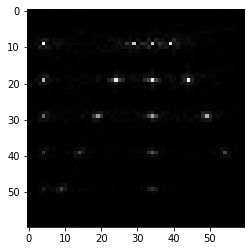

Choose an option:
1 - CGNE 
2 - FISTA 
3 - Exit 
3
Choose an option:
1 - signal 1 
2 - signal 2 
3 - signal 3 
4 - Exit 
2
Abrindo Sinal

Calculando Ganho de Sinal

Choose an option:
1 - CGNE 
2 - FISTA 
3 - Exit 
1
Iniciando Algoritmo CGNE
Iniciando CGNE

Variaveis Incializadas
Inciando Primeira Iteração
Iteração: 1
Erro: 6.018258140756423
Tempo Iteração: 1.3574888706207275 segundos
Tempo Total: 1.3574888706207275 segundos

Iteração: 2
Erro: 6.018646185206951
Tempo Iteração: 1.5327866077423096 segundos
Tempo Total: 2.890275478363037 segundos

Iteração: 3
Erro: 0.0001498143830544198
Tempo Iteração: 1.5622200965881348 segundos
Tempo Total: 4.452495574951172 segundos

Iteração: 4
Erro: 0.02333658725880467
Tempo Iteração: 1.4322316646575928 segundos
Tempo Total: 5.884727239608765 segundos

Iteração: 5
Erro: 0.023420617656453226
Tempo Iteração: 1.370805025100708 segundos
Tempo Total: 7.255532264709473 segundos

Iteração: 6
Erro: 0.9460448762484337
Tempo Iteração: 1.512350082397461 segundos

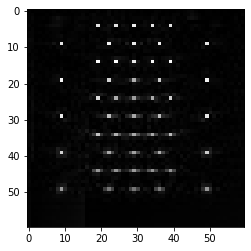

Choose an option:
1 - CGNE 
2 - FISTA 
3 - Exit 
3
Choose an option:
1 - signal 1 
2 - signal 2 
3 - signal 3 
4 - Exit 
4


In [9]:
def main():   
    matriz_modelo = init()
    if matriz_modelo.any():
        runner(matriz_modelo)
    else:
        return True

if __name__ == "__main__":
    main()